# KNN Classifier

In [1]:
import mglearn
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [2]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [3]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [4]:
clf.predict(X_test)

array([0, 0, 0, 0, 1, 1, 0])

In [5]:
clf.score(X_test, y_test)

1.0

## KNeighborsClassifier analysis

> Finding out the *decision boundary*

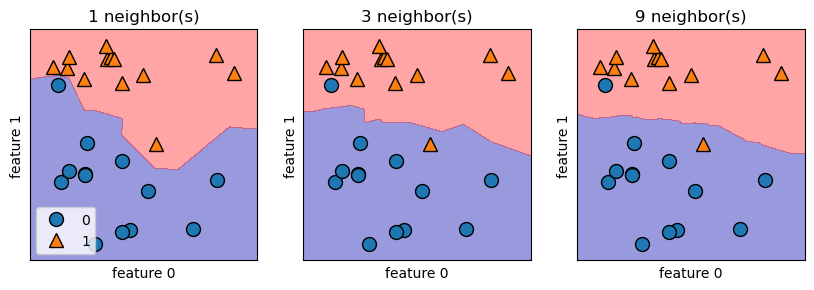

In [6]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    
axes[0].legend(loc=3)

### KNN on Breast Cancer dataset

In [7]:
from sklearn.datasets import load_breast_cancer

cancer_data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer_data.data, cancer_data.target, stratify=cancer_data.target, random_state=66)

In [8]:
training_accuracy = []
testing_accuracy = []
neighbors_settings = range(1,11)

In [9]:
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # training accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # testing accuracy
    testing_accuracy.append(clf.score(X_test, y_test))

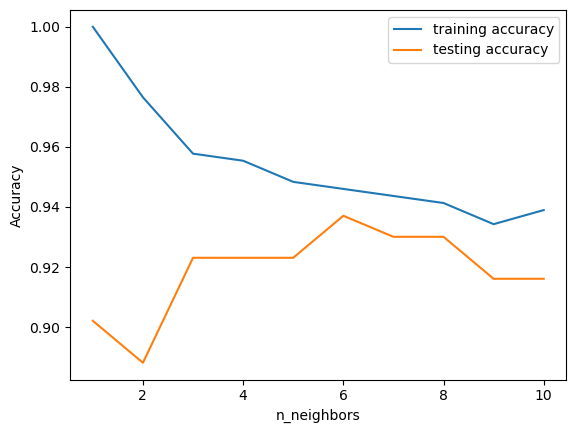

In [10]:
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, testing_accuracy, label="testing accuracy")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.legend()

# KNN Regressor

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [12]:
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [13]:
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [14]:
reg.predict(X_test)

array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

In [15]:
reg.score(X_test, y_test)

0.8344172446249605

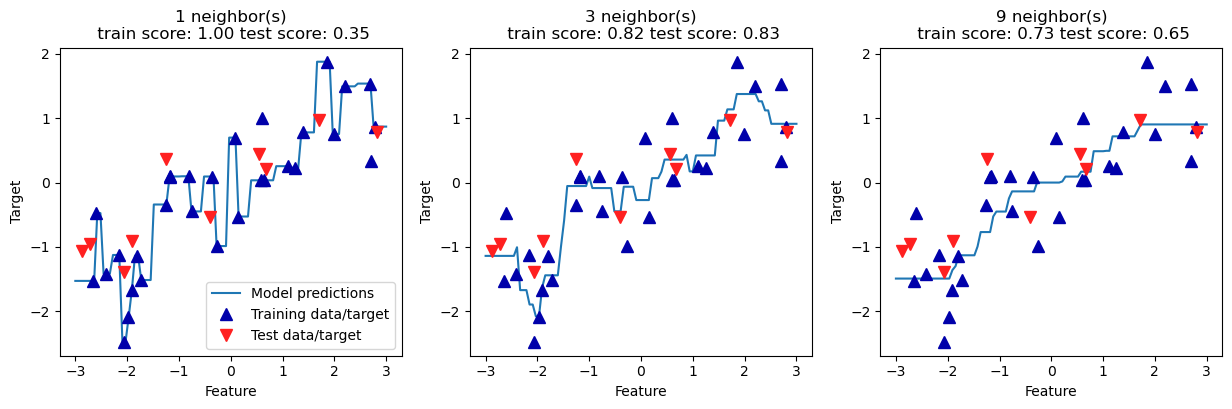

In [16]:
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(15,4))

#create 1000 data points between 3 and -3
line = np.linspace(-3, 3, 100).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
        n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_ylabel("Target")
    ax.set_xlabel("Feature")
    
axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc="best")